In [1]:
!pip install pingouin

In [2]:
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin as pg

In [3]:
lda_level_b_df = pd.read_csv("Results_LDA_level_B.csv")

In [4]:
lda_level_b_df.head()

,MNB,SVC,RandomForests,DecisionTreeClassifier
0,76.54,82.69,96.54,96.15
1,77.00,82.53,95.77,96.15
2,78.00,82.69,95.38,97.33
3,76.54,83.14,94.43,96.34
4,78.00,82.69,95.05,94.13


In [5]:
lda_level_b_df.describe()

,MNB,SVC,RandomForests,DecisionTreeClassifier
count,10.000000,10.000000,10.000000,10.000000
mean,77.062000,83.212000,95.252000,94.618000
std,0.537107,1.526789,0.646526,2.162025
min,76.540000,82.110000,94.430000,91.230000
25%,76.655000,82.690000,94.747500,92.615000
50%,77.000000,82.690000,95.215000,95.355000
75%,77.000000,83.027500,95.615000,96.150000
max,78.000000,87.440000,96.540000,97.330000


<AxesSubplot:>

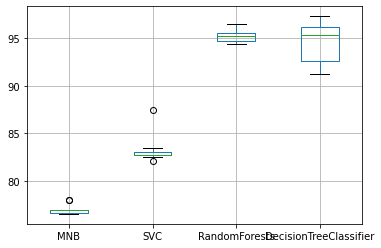

In [6]:
lda_level_b_df.boxplot(column=['MNB','SVC','RandomForests','DecisionTreeClassifier'])

#### The box plot doesnt give any extra information than what we obtained by calculating the mean, it is just a visual representation

# Hypothesis Testing

- Null hypothesis (H0) - There is no difference in the mean precision.
- Alternate hypothesis (H1) - The difference is significant.
- t-test is used for the same, as the classifiers are run on the same dataset, we perform paired t-test.
- p-value is P(D|H0), so smaller the p-value, more confident we are of Null Hypothesis being false.
- If they are below siginificance level like 0.05 or 0.01 then we can reject the null hypothesis.

### T-tests between SVC and RF

In [7]:
stats.ttest_rel(lda_level_b_df.iloc[:,1], lda_level_b_df.iloc[:,2])

Ttest_relResult(statistic=-20.01951568058842, pvalue=9.001751580788727e-09)

### T-Tests between SVC and DTC

In [8]:
stats.ttest_rel(lda_level_b_df.iloc[:,1], lda_level_b_df.iloc[:,3])

Ttest_relResult(statistic=-11.48178494323028, pvalue=1.1204736478680374e-06)

### T-Tests between RF and SVC

In [9]:
stats.ttest_rel(lda_level_b_df.iloc[:,2], lda_level_b_df.iloc[:,1])

Ttest_relResult(statistic=20.01951568058842, pvalue=9.001751580788727e-09)

### T-Tests between RF and DTC

In [10]:
stats.ttest_rel(lda_level_b_df.iloc[:,2], lda_level_b_df.iloc[:,3])

Ttest_relResult(statistic=0.9987446293488487, pvalue=0.3440120452636991)

### T-Tests between DTC and SVC

In [11]:
stats.ttest_rel(lda_level_b_df.iloc[:,3], lda_level_b_df.iloc[:,1])

Ttest_relResult(statistic=11.48178494323028, pvalue=1.1204736478680374e-06)

### T-Tests between DTC and RF

In [12]:
stats.ttest_rel(lda_level_b_df.iloc[:,3], lda_level_b_df.iloc[:,2])

Ttest_relResult(statistic=-0.9987446293488487, pvalue=0.3440120452636991)

# ANOVA TEST

In [13]:
pg.rm_anova(lda_level_b_df.iloc[:,0:3])

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Within,2,18,720.221257,6.644292e-18,2.512268e-12,0.987658,0.651116,False,0.464175,0.046422


# MANN-Whitney U Tests

In [14]:
# Between MNB and DTC

U1, p = mannwhitneyu(lda_level_b_df.iloc[:,0],lda_level_b_df.iloc[:,3],method="asymptotic")

In [15]:
U1

0.0

In [16]:
p

0.00015474878320672315

In [17]:
# between SVC and DT

U1, p = mannwhitneyu(lda_level_b_df.iloc[:,1],lda_level_b_df.iloc[:,3],method="asymptotic")

In [18]:
U1

0.0

In [19]:
p

0.00015932017674062256

In [20]:
# between RF and SVC

U1, p = mannwhitneyu(lda_level_b_df.iloc[:,2],lda_level_b_df.iloc[:,1],method="asymptotic")

In [21]:
U1

100.0

In [22]:
p

0.00016304893553653748

### From the above tests we can clearly see that RF has the significant difference in the mean results and we can conclude that RF has been the most accurate model among the classical models expermiments.